In [4]:
%matplotlib inline

from __future__ import division
import os
import sys
from scipy import integrate, optimize

from scipy.interpolate import interp2d, interp1d

import numpy as np
from numpy import pi,sin,cos,tan,e,arctan,arcsin,arccos,sqrt
from numpy.random import randn
import matplotlib
import matplotlib.pyplot as P
from time import clock

from matplotlib.legend import Legend

matplotlib.rcParams['figure.figsize'] = (9, 6)
P.rcParams['text.usetex'] = True  # not really needed
P.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command
P.rcParams["font.size"] = 26
P.rc('xtick', labelsize=23) 
P.rc('ytick', labelsize=23)
# P.rc('xtick', labelsize=20) 
# P.rc('ytick', labelsize=20)
np.set_printoptions(threshold=100000)


from magmod import *
from magbias_experiments import SKA_zhangpen, CLAR_zhangpen, SKA1, SKA2, cb_hirax as hirax, hirax512, LSST, LSST_nosgfit, n

from lf_photometric import app2abs, cumulative_lumfun

In [5]:
lw = 2.5 #line width forplots

buffer_z = 0.1 #buffer between fg and bg to avoid correlation, 
zfg_max = 2. # last bin goes slightly beyond that. more does not make sense otherwise we have no galaxies left to cross correlate with

In [6]:
#get lmin = delta_l for HIRAX and ska:

# allskydegree = 4*pi*(180/pi)**2

SKAarea = SKA['S_area']
HIRAXarea = hirax['S_area']
HIRAXfov1 = 15 * (pi/180)**2 #this is from table one of the HIRAX white paper
HIRAXfov2 = 56 * (pi/180)**2
HIRAXfov0 = (HIRAXfov1+HIRAXfov2)/2

print "SKA area = {}".format(SKAarea)
print "HIRAX fov = {} to {}".format(HIRAXfov1, HIRAXfov2)

lminSKA = np.amax([10,np.int(np.around(2*pi/np.sqrt(SKAarea)))]) #never use lmin <20
lminHIRAX = np.amax([10, np.int(np.around(2*pi/np.sqrt(HIRAXfov0)))]) #never use lmin<20
print "min ell SKA: {}, min ell HIRAX: {}".format(lminSKA,lminHIRAX)

SKA area = 5.15
HIRAX fov = 0.0045692612968 to 0.0170585755081
min ell SKA: 10, min ell HIRAX: 60


In [4]:
# plotdir = "./plots/"
# plotdir = "/Users/amadeus/Documents/PhD/work/magnification-measurements-intensity/"


lmin = 250; lmax = 30000 # lmin and lmax for Cl calculation

ltab = np.logspace(np.log10(lmin), np.log10(lmax), 250, dtype = int)


# ################################################
# # ZhangPen:
# zf = 0.75
# dzf = 0.5
# zfmin = zf - dzf/2; zfmax = zf + dzf/2

# # zb = (1.5 + 1.9)/2
# # dzb = 1.9 - zb
# zb = (1.5 + 3.9)/2
# dzb = 3.9 - zb
# zbmin = zb - dzb; zbmax = zb + dzb
# ################################################


# Band2:
zfmin = np.amax([0.0005, nutoz21(SKA2["numax"])]) # minimum of HIRAX

zfmax = np.amin([zfg_max, nutoz21(SKA2["numin"])]) # last bin goes slightly beyond that. more does not make sense otherwise we have no galaxies left to cross correlate with

dzf = zfmax - zfmin
# zf = np.array( [zfmin, zfmax])
zf = (zfmin+zfmax)/2

print dzf, "dz"
print zf, "all"

zbmin = zfmax + buffer_z #background


nbinf = 1
print zfmin, "low"
print zfmax, "high"
print nbinf, "BINS"







print "foreground from {} to {}".format(zfmin, zfmax)
print "background from {} to end".format(zbmin)



0.469899585921325 dz
0.2354497929606625 all
0.0005 low
0.470399585921325 high
1 BINS
foreground from 0.0005 to 0.470399585921
background from 0.570399585921 to end


From ZiourHui:

Now we plot the number count slope:

lf_photometric.py:272: RuntimeWarning: divide by zero encountered in divide
  return 0.4*lumphi/lumPhi


DIVIDING BY THE GALAXY BIAS!


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


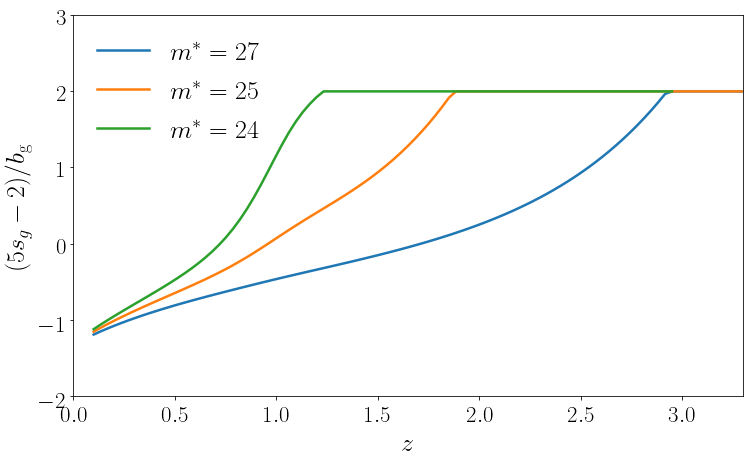

In [5]:
#now plot s :

#different z's to make plot nicer
# z = np.linspace(0.1, 3.5, 500)
# z2 = np.linspace(0.1, 2.5, 500)
# z3 = np.linspace(0.1, 2., 500)

z = np.linspace(0.1, 3.5, 100)
z2 = np.linspace(0.1, 3.5, 100)
z3 = np.linspace(0.1, 3.5, 100)


# Ftab = nsig * Ssys(z, CLAR_zhangpen)
# mtab = -2.5 * np.log10(Ftab)

rmax_default = 27 #for LSST
rmax2 = 25
rmax3 = 24
# rmax3 = 23
fig = P.figure(figsize = (12,7));
# fig = P.figure(figsize = (7,7));
ax2 = fig.add_subplot(111)

sg1tab = 5*sg(z, MAXMAG = rmax_default)-2
sg2tab = 5*sg(z2, MAXMAG = rmax2 )-2
sg3tab = 5*sg(z3, MAXMAG = rmax3 )-2

# #TESTING THE INTERPOLATION FUNCTION:
# sg1tab = 5*sg_interp(z, MAXMAG = rmax_default)-2
# sg2tab = 5*sg_interp(z2, MAXMAG = rmax2 )-2
# sg3tab = sg5minus2(z3, rmax3 )

######################################################################
print "DIVIDING BY THE GALAXY BIAS!"
bg1tab = np.array([bgal_new(zzz, rmax_default) for zzz in z])
bg2tab = np.array([bgal_new(zzz, rmax2) for zzz in z2])
bg3tab = np.array([bgal_new(zzz, rmax3) for zzz in z3])
sg2tab/=bg2tab
sg1tab/=bg1tab
sg3tab/=bg3tab
######################################################################

ax2.plot(z, sg1tab, label = r"$m^* = {}$".format(rmax_default), lw = lw)
ax2.plot(z2, sg2tab, label = r"$m^* = {}$".format(rmax2), lw = lw)
ax2.plot(z3, sg3tab, label = r"$m^* = {}$".format(rmax3), lw = lw)




ax2.set_xlabel(r"$z$")
# ax2.set_ylabel(r"$5s_g-2$")
######################################################################
ax2.set_ylabel(r"$(5s_g-2)/b_\mathrm{g}$")
####################################################################################
# ax2.set_ylim((-2, 14))
ax2.set_ylim((-2, 3))
ax2.set_xlim((0,3.3))


P.legend(frameon = False)
# plotdir = "/Users/amadeus/Documents/PhD/Thesis/tex/images/"
# print "we are saving plot to thesis!!!!"

plotdir = "/Users/amadeus/Documents/PhD/work/MagBias/plots/"
# P.savefig(plotdir + "sg5m2bybg.pdf")
# P.savefig(plotdir + "alpha.pdf")

Now we calculate the galaxy power spectrum and magnification signal:

In [6]:
#Calculate the HI X mag power spectrum Cls:
rmaxtab = [20, 22, 24]
Cl_Hxm_tab = [Cl_HIxmag_CAMB(ltab, zf, dzf, zbmin, MAXMAG = rrr) 
                            for rrr in rmaxtab]

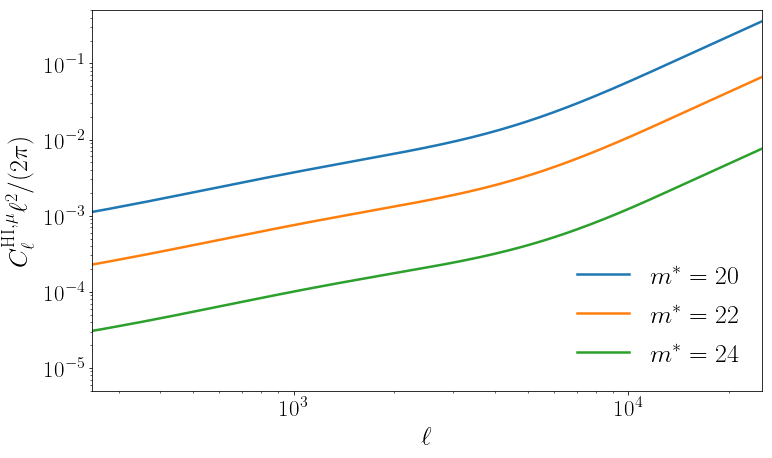

In [7]:
#plot it:
fig = P.figure(figsize = (12,7)); ax = fig.add_subplot(111);

for ri in range(len(rmaxtab)):
    rma = rmaxtab[ri]
    Clll = Cl_Hxm_tab[ri]
    ax.loglog(ltab, Clll*ltab**2 / 2 / pi, label = "$m^*={}$".format(rma), lw = lw)


ax.set_xlabel("$\ell$")
ax.set_ylabel("$C_\ell^\mathrm{HI, \mu} \ell^2/(2\pi)$")

ax.set_xlim((250,25000))
ax.set_ylim((5e-6, 5e-1))
# ax.set_ylim((1e-6, 6e-1))
# ax.legend()
# P.tight_layout()

P.legend(frameon = False, loc = "lower right")
# P.savefig(plotdir + "HIxmag_Cls.pdf")



In Z&P the $\ell$ dependece is $C_\ell^{\mu g} \sim \Delta_m^2(\ell/r(z_f), z_f) / l^3$.

For us it's $C_\ell^\mathrm{HI, mag} \sim P((\ell + 1/2)/r(z),z))$.

NOW: signal to noise!!! an example, same foreground redshift bin for HIRAX and SKA:

In [8]:
#set the magnitude range:
magmax = 27;
magmin = 19;

#make ell table:


lend = 2200;



#full:
ltabH = np.arange(lminHIRAX, lend + lminHIRAX, lminHIRAX)
ltabSKA = np.arange(lminSKA, lend + lminSKA, lminSKA)
# #test:
# ltabH = np.arange(lminHIRAX*10, lend + lminHIRAX, lminHIRAX*10)
# ltabSKA = np.arange(lminSKA*10, lend + lminSKA, lminSKA*10)


# lN = len(ltab)
lNH = len(ltabH)
lNSKA = len(ltabSKA)
p_func_list = [C_l_HIHI_CAMB, C_l_gg_CAMB, Cl_HIxmag_CAMB]


Now we use different redshift bins for HIRAX and SKA. For SKA we use B1 and B2, for HIRAX we make smaller bins, but still wider bins than would be used in a real analysis...

# setting up HIRAX redshift bins:

In [9]:

########################################################################
########################################################################
############WORKING ON HIRAX:####################################



#we should pick a value more carefully later, according to photo-z measurements

# dz = 0.25 #bin width for HIRAX and SKA
dz = 0.5 #bin width for HIRAX and SKA


########################################################################
########################################################################
############MAKING HIRAX REDSHIFT BINS:####################################
########################################################################
########################################################################

numax_HIRAX = hirax["survey_numax"] #800
# numin_HIRAX = numax_HIRAX - hirax['survey_dnutot'] # 400

zHIRAX_min = nutoz21(numax_HIRAX) # minimum of HIRAX

print zfg_max, zHIRAX_min
zHIRAX_allbin = np.arange( zHIRAX_min, zfg_max + dz, step = dz)
print zHIRAX_allbin, "all"
zHIRAX_lowbin = zHIRAX_allbin[:-1]
zHIRAX_highbin = zHIRAX_allbin[1:]
zHIRAX_meanbin = (zHIRAX_lowbin + zHIRAX_highbin)/2


zbmin_HIRAX = zHIRAX_highbin + buffer_z

nbinH = len(zHIRAX_lowbin)
print zHIRAX_lowbin, "low"
print zHIRAX_highbin, "high"
print zHIRAX_meanbin, "mean"
print zbmin_HIRAX, "bg min"
print nbinH




2.0 0.7755075
[0.7755075 1.2755075 1.7755075 2.2755075] all
[0.7755075 1.2755075 1.7755075] low
[1.2755075 1.7755075 2.2755075] high
[1.0255075 1.5255075 2.0255075] mean
[1.3755075 1.8755075 2.3755075] bg min
3


Text(0.5,0,'$z$')

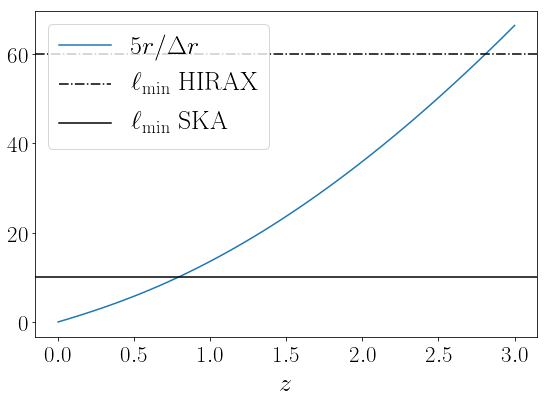

In [10]:
#comparing lmin and dz
#lmin should be more than 5 r/dr (Alkistis said that, we should probably get a reference)
zzztab = np.linspace(0.0001,3)
rrrtab = rCom(zzztab)
rrrtab_plus = rCom(zzztab+dz/2)
rrrtab_minus = rCom(zzztab-dz/2)
drrrtab = rrrtab_plus - rrrtab_minus

test= 5*rrrtab/drrrtab

fig = P.figure(); ax=fig.add_subplot(111);
ax.plot(zzztab, test, label = r"$5r/\Delta r$")
ax.axhline(lminHIRAX, c="black", label = r"$\ell_{\rm min} {\rm~HIRAX}$", ls = "-.")
ax.axhline(lminSKA
           , c="black", label =r"$\ell_{\rm min} {\rm~SKA}$")
ax.legend()
ax.set_xlabel(r"$z$")

# Optimization of m* for each HIRAX redshift bin

In [46]:
########################################################################
########################################################################
# optimize S2N(m*) FOR HIRAX

ltab_HIRAX_opt = np.array([300]) #only one ell for opt

# mstar_H = np.zeros(nbinH)
opti_H = []
guesses = np.array([23,26,27])
for iz in range(nbinH):
    S2Nargs = (ltab_HIRAX_opt, zHIRAX_lowbin[iz], zHIRAX_highbin[iz], zbmin_HIRAX[iz], [hirax, LSST], [C_l_HIHI_CAMB, C_l_gg_CAMB, Cl_HIxmag_CAMB], lminHIRAX)
    opti = optimize.minimize( S2N_for_opt, [guesses[iz]], args = S2Nargs, method='Nelder-Mead', tol = 1e-2, bounds = ((magmin,magmax),))
    opti_H.append(opti)

mso_H = [oo['x'] for oo in opti_H] #m star opt = mso


calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrel

calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise


In [47]:
print mso_H

[array([23.08984375]), array([26.13710938]), array([27.])]


# Now calculate the S2N for each HIRAX bin and the respective m*

In [48]:
########################################################################
########################################################################
# CALCULATE S2N FOR HIRAX
S2Nlist_full = [] #1024 dishes HIRAX
S2Nlist_512 = [] #512 dishes HIRAX

# ellNL = [] #nonlinear scale according to smith et a. with knl0 = 0.14



for i in range(nbinH):


#     zbbmax_H = zmax_of_MAXMAG(mso_H[i]) #max redshift for optimized m*


    
#     k_NL = 0.14*(1+zb_H)#background redshift is relevant
#     ellNL.append(k_NL * rCom(zb_H))
    
    
    S2Nlist_full.append( S2N_of_mstar_and_zf(mso_H[i], ltabH, zHIRAX_lowbin[i], zHIRAX_highbin[i], zbmin_HIRAX[i],
                                             SURVEY = [hirax, LSST]))
    
    S2Nlist_512.append( S2N_of_mstar_and_zf(mso_H[i], ltabH, zHIRAX_lowbin[i], zHIRAX_highbin[i], zbmin_HIRAX[i],
                                             SURVEY = [hirax512, LSST]))


calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...


In [36]:
#print the nonlinear scale for HIRAX:
ellNL = [] #nonlinear scale according to smith et a. with knl0 = 0.14

for i in range(nbinH):


    k_NL = 0.14*(1+zbmin_HIRAX[i])**(2/3)#background redshift is relevant
    ellNL.append(k_NL * rCom(zbmin_HIRAX[i]))
    
for i in range(len(ellNL)):
               print "ell NL for HIRAX: {}".format(ellNL[i])


ell NL for HIRAX: 1056.61314023
ell NL for HIRAX: 1451.50133278
ell NL for HIRAX: 1835.47283998


# SKA b1 and b2 redshift bins

In [16]:
########################################################################
########################################################################
############SETTING UP SKA B1 & 2:####################################

# Band1:
zSKA1_min = np.amax([0.0005, nutoz21(SKA1["numax"])]) # minimum of HIRAX

zSKA1_max = np.amin([zfg_max, nutoz21(SKA1["numin"])]) # last bin goes slightly beyond that. more does not make sense otherwise we have no galaxies left to cross correlate with

print "Band 1:"
print zSKA1_max, zSKA1_min

zSKA1_allbin = np.arange( zSKA1_min, zSKA1_max + dz, step = dz)
print zSKA1_allbin, "all"
zSKA1_lowbin = zSKA1_allbin[:-1]
zSKA1_highbin = zSKA1_allbin[1:]
zSKA1_meanbin = (zSKA1_lowbin + zSKA1_highbin)/2

zbSKA1_min = zSKA1_highbin + buffer_z #background


nbinS1 = len(zSKA1_lowbin)
print zSKA1_lowbin, "low"
print zSKA1_highbin, "high"
print zSKA1_meanbin, "mean"
print nbinS1, "BINS"


# Band2:
zSKA2_min = np.amax([0.0005, nutoz21(SKA2["numax"])]) # minimum of HIRAX

zSKA2_max = np.amin([zfg_max, nutoz21(SKA2["numin"])]) # last bin goes slightly beyond that. more does not make sense otherwise we have no galaxies left to cross correlate with

print "\nBand 2:"
print zSKA2_max, zSKA2_min

# zSKA2_allbin = np.arange( zSKA2_min, zSKA2_max + dz, step = dz)
dzSKA2 = zSKA2_max - zSKA2_min
zSKA2_allbin = np.array( [zSKA2_min, zSKA2_max])

print dzSKA2, "dz"
print zSKA2_allbin, "all"
zSKA2_lowbin = zSKA2_allbin[:-1]
zSKA2_highbin = zSKA2_allbin[1:]
zSKA2_meanbin = (zSKA2_lowbin + zSKA2_highbin)/2

zbSKA2_min = zSKA2_highbin + buffer_z #background


nbinS2 = len(zSKA2_lowbin)
print zSKA2_lowbin, "low"
print zSKA2_highbin, "high"
print zSKA2_meanbin, "mean"
print nbinS2, "BINS"



Band 1:
2.0 0.3412710103871576
[0.34127101 0.84127101 1.34127101 1.84127101 2.34127101] all
[0.34127101 0.84127101 1.34127101 1.84127101] low
[0.84127101 1.34127101 1.84127101 2.34127101] high
[0.59127101 1.09127101 1.59127101 2.09127101] mean
4 BINS

Band 2:
0.470399585921325 0.0005
0.469899585921325 dz
[0.0005     0.47039959] all
[0.0005] low
[0.47039959] high
[0.23544979] mean
1 BINS


# SKA optimization for m*

In [51]:
 ############OPTIMIZE SKA B1 AND B2:####################################
########################################################################
#######################################################################  

ltab_SKA1_opt = np.array([100]) #only one ell for opt
ltab_SKA2_opt = np.array([150]) #only one ell for opt

opti_SKA1 = []
opti_SKA2 = []
guessesSKA1 = np.array([23,23, 26,27])
guessesSKA2 = 21 * np.ones(nbinS2)

for iz in range(nbinS1):
    S2Nargs = (ltab_SKA1_opt, zSKA1_lowbin[iz], zSKA1_highbin[iz], zbSKA1_min[iz], [SKA1, LSST], [C_l_HIHI_CAMB, C_l_gg_CAMB, Cl_HIxmag_CAMB], lminSKA)
    opti = optimize.minimize( S2N_for_opt, [guessesSKA1[iz]], args = S2Nargs, method='Nelder-Mead', tol = 1e-2, bounds = ((magmin,magmax),))
    opti_SKA1.append(opti)

mso_SKA1 = [oo['x'] for oo in opti_SKA1] #m star opt = mso




for iz in range(nbinS2):
    S2Nargs = (ltab_SKA2_opt, zSKA2_lowbin[iz], zSKA2_highbin[iz], zbSKA2_min[iz], [SKA2, LSST], [C_l_HIHI_CAMB, C_l_gg_CAMB, Cl_HIxmag_CAMB], lminSKA)
    opti = optimize.minimize( S2N_for_opt, [guessesSKA2[iz]], args = S2Nargs, method='Nelder-Mead', tol = 1e-2, bounds = ((magmin,magmax),))
    opti_SKA2.append(opti)

mso_SKA2 = [oo['x'] for oo in opti_SKA2] #m star opt = mso

print mso_SKA1, "SKA1"

print mso_SKA2, "SKA2"



calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrel

calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrel

In [52]:
print mso_SKA1
print mso_SKA2

[array([23.646875]), array([23.08085937]), array([26.27421875]), array([27.])]
[array([22.07460938])]


In [53]:
#  ############OPTIMIZE SKA B1 AND B2:####################################
# ########################################################################
# #######################################################################  
    
    
    
# ltab_SKA_opt = np.array([100]) #only one ell for opt

# opti_SKA = []
# guess_b1 = 24

# guess_b2 = 20

# S2Nargs_b1 = (ltab_SKA_opt, zmin_b1, zmax_b1, buffer_z, [SKA, LSST], [C_l_HIHI_CAMB, C_l_gg_CAMB, Cl_HIxmag_CAMB])
# opti_b1 = optimize.minimize( S2N_for_opt, guess_b1, args = S2Nargs_b1, method='Nelder-Mead', tol = 1e-2, bounds = ((magmin,magmax),))

# S2Nargs_b2 = (ltab_SKA_opt, zmin_b2, zmax_b2, buffer_z, [SKA, LSST], [C_l_HIHI_CAMB, C_l_gg_CAMB, Cl_HIxmag_CAMB])
# opti_b2 = optimize.minimize( S2N_for_opt, guess_b2, args = S2Nargs_b2, method='Nelder-Mead', tol = 1e-2, bounds = ((magmin,magmax),))

    
# mso_b1 = opti_b1['x'] #m star opt = mso
# mso_b2 = opti_b2['x'] #m star opt = mso

# print mso_b1, mso_b2

# now use the optimized m* for S2N for SKA

In [54]:
########################################################################
########################################################################
# CALCULATE S2N FOR SKA
S2Nlist_SKA1 = []
S2Nlist_SKA2 = []

ellNL_S1 = [] #band 1: nonlinear scale according to smith et a. with knl0 = 0.14
ellNL_S2 = [] #band 2: nonlinear scale according to smith et a. with knl0 = 0.14



for i in range(nbinS1):




    k_NL = 0.14*(1+zbSKA1_min[i])**(2/3)#background redshift is relevant
    ellNL_S1.append(k_NL * rCom(zbSKA1_min[i]))
    
    
    S2Nlist_SKA1.append( S2N_of_mstar_and_zf(mso_SKA1[i], ltabSKA, zSKA1_lowbin[i], zSKA1_highbin[i], zbSKA1_min[i],
                                             SURVEY = [SKA1, LSST]))
    
for i in range(nbinS2):



    
    k_NL = 0.14*(1+zbSKA1_min[i])**(2/3)#background redshift is relevant
    ellNL_S2.append(k_NL * rCom(zbSKA1_min[i]))
    
    
    S2Nlist_SKA2.append( S2N_of_mstar_and_zf(mso_SKA2[i], ltabSKA, zSKA2_lowbin[i], zSKA2_highbin[i], zbSKA2_min[i],
                                             SURVEY = [SKA2, LSST]))


calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise


In [38]:
#print the nonlinear scales for HIRAX and SKA:


print "HIRAX:"
for i in range(nbinH):


    k_NL = 0.14*(1+zbmin_HIRAX[i])**(2/3)#background redshift is relevant
    ell_NL = k_NL * rCom(zbmin_HIRAX[i])
    print r"z= {}, ell_NL = {}".format(zbmin_HIRAX[i], ell_NL)
   


print "\nSKA B2:"
for i in range(nbinS2):
    k_NL = 0.14*(1+zbSKA2_min[i])**(2/3)#background redshift is relevant
    ell_NL = k_NL * rCom(zbSKA2_min[i])
    print r"z= {}, ell_NL = {}".format(zbSKA2_min[i], ell_NL)
    
    
print "\nSKA B1:"
for i in range(nbinS1):


    k_NL = 0.14*(1+zbSKA1_min[i])**(2/3)#background redshift is relevant
    ell_NL = k_NL * rCom(zbSKA1_min[i])
    print r"z= {}, ell_NL = {}".format(zbSKA1_min[i], ell_NL)

HIRAX:
z= 1.3755075, ell_NL = 1056.61314023
z= 1.8755075, ell_NL = 1451.50133278
z= 2.3755075, ell_NL = 1835.47283998

SKA B2:
z= 0.570399585921, ell_NL = 411.783406485

SKA B1:
z= 0.941271010387, ell_NL = 707.660007514
z= 1.44127101039, ell_NL = 1109.0980184
z= 1.94127101039, ell_NL = 1502.65494874
z= 2.44127101039, ell_NL = 1885.12497829


In [55]:
print "SKA band 1 nonlinear ell: {}".format(ellNL_S1)
print "SKA band 2 nonlinear ell: {}".format(ellNL_S2)

SKA band 1 nonlinear ell: [882.7818098958503, 1493.3969522613245, 2152.968191390522, 2846.0756519044767]
SKA band 2 nonlinear ell: [882.7818098958503]


# before plotting the S2N we show the optimization of m*:

In [56]:
#MAKE NICE PLOT FOR S2N(m*) for SKA and HIRAX:
magtab = np.linspace(magmin,magmax,150) #fine...
# magtab = np.linspace(magmin,magmax,30) #coarse...


########################################################################
########################################################################
# # FOR HIRAX
# ltab_HIRAX = np.array([300]) #only few ells to speed up


S2N_H = np.zeros((len(magtab), nbinH, len(ltab_HIRAX_opt)))

for im in range(len(magtab)): #magnitude cutoff
    for iz in range(nbinH): #redshift bin of HIRAX
        mm = magtab[im]
        if zbmin_HIRAX[iz] > zbg_max(mm, LSST):
            S2N_H_now = 0
        else:
            S2N_H_now = S2N_of_mstar_and_zf(mm, ltab_HIRAX_opt, zHIRAX_lowbin[iz], zHIRAX_highbin[iz], zbmin_HIRAX[iz],
                                            SURVEY = [hirax, LSST], D_ELL = lminHIRAX)
        S2N_H[im,iz,:] = S2N_H_now


########################################################################
########################################################################
# FOR SKA1



# ltab_SKA1 = np.array([100]) #only few ells to speed up


S2N_S1 = np.zeros((len(magtab), nbinS1, len(ltab_SKA1_opt)))

for im in range(len(magtab)): #magnitude cutoff
    for iz in range(nbinS1): #redshift bin of SKA
        mm = magtab[im]
        if zbSKA1_min[iz] > zbg_max(mm, LSST):
            S2N_S_now = 0
        else:
            S2N_S_now = S2N_of_mstar_and_zf(mm, ltab_SKA1_opt, zSKA1_lowbin[iz], zSKA1_highbin[iz], zbSKA1_min[iz],
                                            SURVEY = [SKA1, LSST], D_ELL = lminSKA)
        S2N_S1[im,iz,:] = S2N_S_now


        
########################################################################
########################################################################
# FOR SKA2



# ltab_SKA2 = np.array([150]) #only few ells to speed up


S2N_S2 = np.zeros((len(magtab), nbinS2, len(ltab_SKA2_opt)))

for im in range(len(magtab)): #magnitude cutoff
    for iz in range(nbinS2): #redshift bin of SKA
        mm = magtab[im]
        if zbSKA2_min[iz] > zbg_max(mm, LSST):
            S2N_S_now = 0
        else:
            S2N_S_now = S2N_of_mstar_and_zf(mm, ltab_SKA2_opt, zSKA2_lowbin[iz], zSKA2_highbin[iz], zbSKA2_min[iz],
                                            SURVEY = [SKA2, LSST], D_ELL = lminSKA)
        S2N_S2[im,iz,:] = S2N_S_now



calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer n

calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating interferometer noise...
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dis

calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrel

calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrelation noise
calculating single dish autocorrel

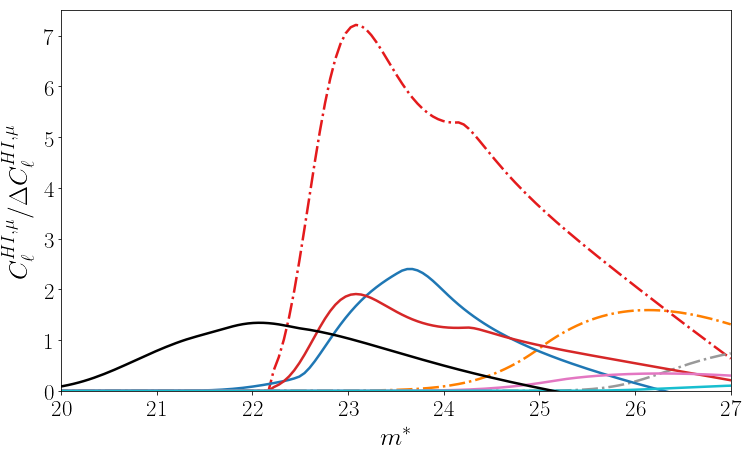

In [68]:
#MAKE NICE PLOT FOR S2N(m*) for SKA:

#colors for HIRAX and SKA:
color_array_HIRAX = np.linspace(0,1, nbinH)#+1 because we do not want the grey in set1
color_array_SKA1 = np.linspace(0,1,nbinS1) #same for now, changed later!
color_array_SKA2 = np.linspace(0,1,nbinS2) #same for now, changed later!




cols = ["blue", "purple", "red"]

fig = P.figure(figsize = (12,7)); ax = fig.add_subplot(111);

# ax.plot(magtab, SKA_b1_LSST_maxmag_arr[:,2], c='grey', ls = "--", label = r"$\mathrm{SKA~b1}$")

# ax.plot(magtab, SKA_b2_LSST_maxmag_arr[:,2], c='black', ls = "--", label = r"$\mathrm{SKA~b2}$")


# ax.axvline(mso_b1, c = 'grey')
# ax.axvline(mso_b2, c= 'black')




for iz in range(nbinH):
    ci = color_array_HIRAX[iz]
    zfmax_now = np.around(zHIRAX_highbin[iz],2)
    zfmin_now = np.around(zHIRAX_lowbin[iz],2)
    for ielll in [0]:


        ax.plot(magtab, S2N_H[:,iz,ielll], lw =lw, c=P.cm.Set1(ci), ls = "-.", 
                label = r"$\mathrm{{~HIRAX~}} z_\mathrm{{f}} = {} \mathrm{{~to~}} {}$".format(zfmin_now, zfmax_now))
#     ax.axvline( mso_H[iz], c=P.cm.Set1(ci))

for iz in range(nbinS1):
    ci = color_array_SKA1[iz]
    zfmax_now = np.around(zSKA1_highbin[iz],2)
    zfmin_now = np.around(zSKA1_lowbin[iz],2)
    for ielll in [0]:
        ax.plot(magtab, S2N_S1[:,iz,ielll], lw = lw, c=P.cm.tab10(ci), ls = "-", 
                label = r"$\mathrm{{~SKA~B1~}} z_\mathrm{{f}} = {} \mathrm{{~to~}} {}$".format(zfmin_now, zfmax_now))

for iz in range(nbinS2):
    ci = color_array_SKA2[iz]
    zfmax_now = np.around(zSKA2_highbin[iz],2)
    zfmin_now = np.around(zSKA2_lowbin[iz],2)
    for ielll in [0]:
        ax.plot(magtab, S2N_S2[:,iz,ielll],lw = lw, c="black", ls = "-", 
                label = r"$\mathrm{{~SKA~B2~}} z_\mathrm{{f}} = {} \mathrm{{~to~}} {}$".format(zfmin_now, zfmax_now))




# ax.legend(frameon = False)
ax.set_xlabel(r"$m^*$")
ax.set_ylabel("$C_\ell^{HI,\mu} / \Delta C_\ell^{HI,\mu} $")
ax.set_ylim((0,7.5))
# ax.set_ylim((0,2.5))
ax.set_xlim((20,27))

# plotdir = "./plots/"
# print plotdir
# P.savefig(plotdir + "S2N_of_mstar.pdf")



# main plot S2N:

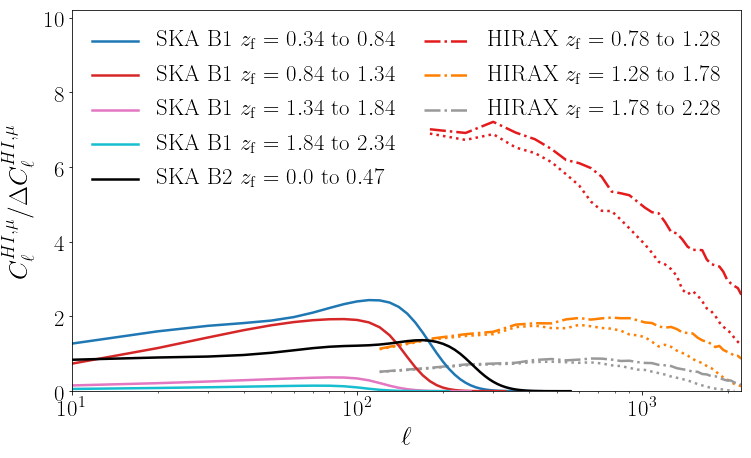

In [67]:
#plotting HIRAX and SKA for different binnings:

fig = P.figure(figsize = (12,7)); ax1 = fig.add_subplot(111); 


Hlines = [] #for the legend
SKAlines = [] #for the legend
Hlabel = [] #line labels
SKAlabel = []

for i in range(nbinH):
    ci = color_array_HIRAX[i]
    zfmax_now = np.around(zHIRAX_highbin[i],2)
    zfmin_now = np.around(zHIRAX_lowbin[i],2)
    
    plotcond = (S2Nlist_full[i] > 1e-5)
    plotcond512 = (S2Nlist_512[i] > 1e-5)
    Hlabel.append( r"$\mathrm{{~HIRAX~}} z_\mathrm{{f}} = {} \mathrm{{~to~}} {}$".format(zfmin_now, zfmax_now)  )
    Hlines += ax1.semilogx(ltabH[plotcond], S2Nlist_full[i][plotcond], 
                 color=P.cm.Set1(ci), ls = "-.", lw = lw)
    ax1.semilogx(ltabH[plotcond512], S2Nlist_512[i][plotcond512], 
                 color=P.cm.Set1(ci), ls = ":", lw = lw)
#     ax1.semilogx(ltab, S2N_CVlist[i], ls = "-", 
#                  color=P.cm.Set1(ci))
#     ax1.axvline(ellNL[i],
#                color=P.cm.Set1(ci))


for i in range(nbinS1):
    ci = color_array_SKA1[i]
    zfmax_now = np.around(zSKA1_highbin[i],2)
    zfmin_now = np.around(zSKA1_lowbin[i],2)
    
    plotcond = (S2Nlist_SKA1[i] > 1e-5)
    SKAlabel.append(r"$\mathrm{{~SKA~B1~}} z_\mathrm{{f}} = {} \mathrm{{~to~}} {}$".format(zfmin_now, zfmax_now))
    SKAlines += ax1.semilogx(ltabSKA[plotcond], S2Nlist_SKA1[i][plotcond],
                 color=P.cm.tab10(ci), ls = "-", lw = lw)

    
for i in range(nbinS2):
    ci = color_array_SKA2[i]
    zfmax_now = np.around(zSKA2_highbin[i],2)
    zfmin_now = np.around(zSKA2_lowbin[i],2)
    
    plotcond = (S2Nlist_SKA2[i] > 1e-5)
    SKAlabel.append( r"$\mathrm{{~SKA~B2~}} z_\mathrm{{f}} = {} \mathrm{{~to~}} {}$".format(zfmin_now, zfmax_now) )
    SKAlines += ax1.semilogx(ltabSKA[plotcond], S2Nlist_SKA2[i][plotcond],
                 color="black", ls = "-", lw = lw)



# ax1.fill_between( np.array( [ellNL[0],ellNL[-1] ]), -10, 100, color = 'grey', alpha = 0.4)

# ax1.semilogx(ltabSKA, S2N_SKAb1_LSST, 
#              label = r"$\mathrm{{SKA~B1~}} z_\mathrm{{f}} = {} \mathrm{{~to~}} {}$".format(np.around(zmin_b1,1), np.around(zmax_b1,1)), color = "grey", ls = "--")


# ax1.semilogx(ltabSKA, S2N_SKAb2_LSST, label = r"$\mathrm{{SKA~B2~}} z_\mathrm{{f}} = {} \mathrm{{~to~}} {}$".format(np.around(zmin_b2,1), np.around(zmax_b2,1)), color = "black", ls = "--")

    
ax1.set_ylabel("$C_\ell^{HI,\mu} / \Delta C_\ell^{HI,\mu} $")
ax1.set_xlabel("$\ell$")
# ax1.legend(loc = "upper left", fontsize = 20, frameon = False, ncol = 1)
ax1.legend(Hlines, Hlabel, loc = "upper right", fontsize = 23, frameon = False, ncol = 1)
leg = Legend(ax1, SKAlines, SKAlabel, loc = "upper left", fontsize = 23, frameon = False, ncol = 1)
ax1.add_artist(leg);




# ax1.set_ylim((0,50))
ax1.set_ylim((0.01,10.2))
ax1.set_xlim((10, ltabH[-1]))
# plotdir = "/Users/amadeus/Documents/PhD/Oxford/pres10min2/"


# P.savefig(plotdir + "S2N_SKA_HIRAX.pdf")


##### cumulative S2N:

In [59]:
# NLSKA = len(ltabSKA) #number of ell for SKA
# NLH = len(ltabH) #number of ell for HIRAX
HIRAX_cum = []
HIRAX512_cum = []
SKA1_cum = []
SKA2_cum = []
for i in range(nbinH):
    HIR = np.cumsum( S2Nlist_full[i]**2)
    HIR512 = np.cumsum( S2Nlist_512[i]**2)
    HIRAX_cum.append(np.sqrt(HIR))
    HIRAX512_cum.append(np.sqrt(HIR512))

    
for i in range(nbinS1):
    SSKKAA = np.cumsum( S2Nlist_SKA1[i]**2)
    SKA1_cum.append(np.sqrt(SSKKAA))

for i in range(nbinS2):
    SSKKAA = np.cumsum( S2Nlist_SKA2[i]**2)
    SKA2_cum.append(np.sqrt(SSKKAA))


cum SN HIRAX bin 0: 28.9084562021
cum SN HIRAX bin 1: 9.47166829632
cum SN HIRAX bin 2: 3.83358064467
cum SN SKA B1 bin 0: 8.68765836271
cum SN SKA B1 bin 1: 6.27734656502
cum SN SKA B1 bin 2: 1.05998825376
cum SN SKA B1 bin 3: 0.388029425249
cum SN SKA B2 bin 0: 5.87017640977


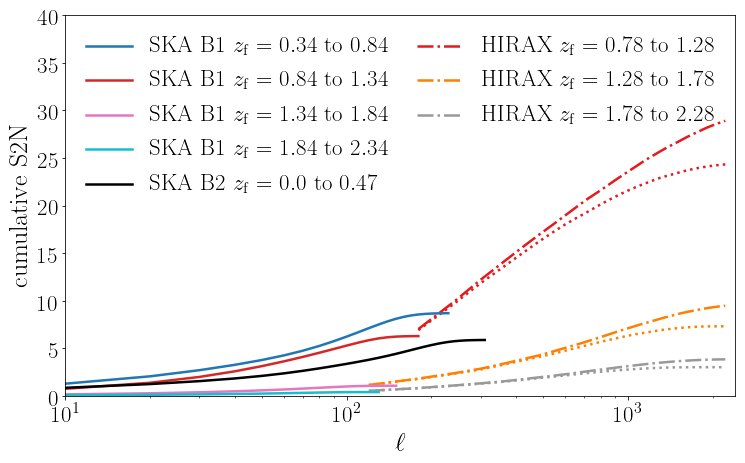

In [61]:
fig = P.figure(figsize = (12,7)); ax= fig.add_subplot(111);


Hlines = [] #for the legend
SKAlines = [] #for the legend
Hlabel = [] #line labels
SKAlabel = []


# ax.fill_between( np.array( [ellNL[0],ellNL[-1] ]), -10, 1000, color = 'grey', alpha = 0.4)


for i in range(nbinH):
    istart = np.where(HIRAX_cum[i] > 1e-2)[0][0]
    ci = color_array_HIRAX[i]
    zfmax_now = np.around(zHIRAX_highbin[i],2)
    zfmin_now = np.around(zHIRAX_lowbin[i],2)
    Hlines += ax.semilogx(ltabH[istart:], HIRAX_cum[i][istart:],
                 color=P.cm.Set1(ci), ls = "-.", lw = lw)
    Hlabel.append(r"$\mathrm{{~HIRAX~}} z_\mathrm{{f}} = {} \mathrm{{~to~}} {}$".format(zfmin_now, zfmax_now))
    ax.semilogx(ltabH[istart:], HIRAX512_cum[i][istart:], color=P.cm.Set1(ci), ls = ":", lw = lw)
    print "cum SN HIRAX bin {}: {}".format(i, HIRAX_cum[i][-1])

    
for i in range(nbinS1):
    ci = color_array_SKA1[i]
    zfmax_now = np.around(zSKA1_highbin[i],2)
    zfmin_now = np.around(zSKA1_lowbin[i],2)
    
    istart_SKA = np.where(S2Nlist_SKA1[i]/SKA1_cum[i][-1]<3e-2)[0][0] #index where ratio of S2N to cumulative S2N is 3%
    
    SKAlines += ax.semilogx(ltabSKA[:istart_SKA], SKA1_cum[i][:istart_SKA],
                 color=P.cm.tab10(ci), ls = "-", lw = lw)
    SKAlabel.append(r"$\mathrm{{~SKA~B1~}} z_\mathrm{{f}} = {} \mathrm{{~to~}} {}$".format(zfmin_now, zfmax_now))
    print "cum SN SKA B1 bin {}: {}".format(i, SKA1_cum[i][-1])

for i in range(nbinS2):
    ci = color_array_SKA2[i]
    zfmax_now = np.around(zSKA2_highbin[i],2)
    zfmin_now = np.around(zSKA2_lowbin[i],2)
    
    istart_SKA2 = np.where(S2Nlist_SKA2[i]/SKA2_cum[i][-1]<3e-2)[0][0] #index where ratio of S2N to cumulative S2N is 3%

    
    SKAlines += ax.semilogx(ltabSKA[:istart_SKA2], SKA2_cum[i][:istart_SKA2],
                 color="black", ls = "-", lw = lw)
    SKAlabel.append(r"$\mathrm{{~SKA~B2~}} z_\mathrm{{f}} = {} \mathrm{{~to~}} {}$".format(zfmin_now, zfmax_now))
    print "cum SN SKA B2 bin {}: {}".format(i, SKA2_cum[i][-1])


ax.set_xlabel(r"$\ell$")
ax.set_ylabel(r"$\mathrm{cumulative~S2N}$")
# ax.legend(loc = "upper left", fontsize = 20, frameon = False)
# ax.set_ylim((-1,180))
ax.set_ylim((0,40))
# ax.set_xlim((3e0,ellNL[-2]))
ax.set_xlim((10,2.4e3))


ax.legend(Hlines, Hlabel, loc = "upper right", fontsize = 23, frameon = False, ncol = 1)
leg = Legend(ax, SKAlines, SKAlabel, loc = "upper left", fontsize = 23, frameon = False, ncol = 1)
ax.add_artist(leg);


# P.tight_layout()
# P.savefig(plotdir + "S2N_SKA_HIRAX_CUM.pdf")